In [2]:
# Example taken from: 
# https://python.plainenglish.io/understanding-logistic-regression-and-building-model-in-python-1752a7e562a8

import pandas as pd

fn = '/Users/ad/Documents/Exercises/signage_survey/data/Signage2015Format.csv'
df = pd.read_csv(fn)
df = df[['sign', 'Illuminati', 'Height', 'Width', 'Area', 'latitude', 'longitude']]

# Map Sign Attributes
df['illuminated'] = df['Illuminati'].map({'Yes': 1, 'No': 0})
df['signs'] = df['sign'].map({'bndrywll': 1, 'cnopy': 2, 'flatsgn': 3, 'projctng': 4})
df.head()

df.tail(10)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ad/Documents/Exercises/signage_survey/data/Signage2015Format.csv'

In [19]:
feature_cols = ['signs', 'Width', 'Height', 'Area','latitude','longitude']

X = df[feature_cols] # Features
y = df.illuminated # Target variable

In [20]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict 
y_pred=logreg.predict(X_test)

In [22]:
# Model Evaluatin usigng Confusion Matrix

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[12,  7],
       [15, 14]])

NameError: name 'pd' is not defined

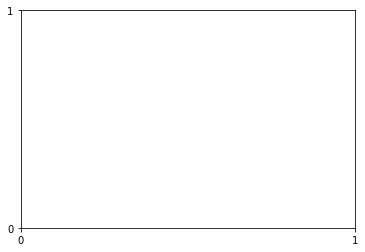

In [1]:
#Visualise Confusion Matric Using a Heatmap

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [24]:
#Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5416666666666666
Precision: 0.6666666666666666
Recall: 0.4827586206896552


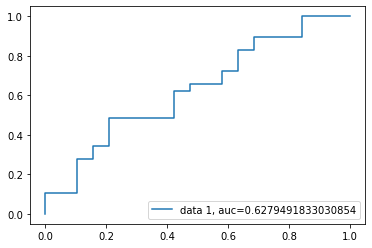

In [25]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()